<a href="https://colab.research.google.com/github/GalaRusina/Proyecto_Impacto_Covid_Espana/blob/main/Proyecto_Impacto_Covid_Espa%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introducción**

En este proyecto se va a realizar un análisis de datos sencillo de las hospitalizaciones de UCI en España producidas por el Covid 19.

##**Etapas del Análisis de Datos**

1. Importar módulos de Python
2. Obtención de datos
3. Gestión de Datos (Data Wrangling)
4. Análisis exploratorio de datos (EDA) y visualización
5. Conclusiones



## **1. Importar los módulos de Python**


In [2]:
#Importa los módulos y paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

## **2. Obtención de datos**

Datos recopilados por instituto Carlos III de Madrid.

In [4]:
! gdown 14UPqOmGPUQBGP-xMHgFzAjgLsg4bf3eB

Downloading...
From: https://drive.google.com/uc?id=14UPqOmGPUQBGP-xMHgFzAjgLsg4bf3eB
To: /content/casos_covid.csv
100% 40.4M/40.4M [00:00<00:00, 130MB/s]


In [5]:
df = pd.read_csv('/content/casos_covid.csv',parse_dates=['fecha'])
df.head()


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


##**3. Gestión de Datos (Data Wrangling)**

En esta etapa, los datos se ven modificados para que sea más fácil realizar un posterior análisis y visualización. Las modificaciones más comunes que pueden sufrir los datos son limpieza, transformación, combinación y redimensionado.

Antes de realizar cualquier tipo de modificación de los datos, es recomendable analizar sus columnas, valores nulos, número de filas, tipos de datos, etc.


In [6]:
# Número de filas y columnas
df.shape

(1367400, 8)

Comprobamos qué tipo de datos contiene cada columna, y si contiene valores nulos.

In [7]:
# Tipo de datos por columna
df.dtypes

provincia_iso            object
sexo                     object
grupo_edad               object
fecha            datetime64[ns]
num_casos                 int64
num_hosp                  int64
num_uci                   int64
num_def                   int64
dtype: object

In [8]:
# Columnas con valores nulos
df.isnull().sum()

provincia_iso    25800
sexo                 0
grupo_edad           0
fecha                0
num_casos            0
num_hosp             0
num_uci              0
num_def              0
dtype: int64

In [9]:
df = df.dropna() #eliminamos datos con valores nulos
df.shape

(1341600, 8)

In [10]:
df.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


Creamos una lista con los valores únicos de la columna 'provincia_iso'. Estos valores se refieren a las iniciales de las provincias.

In [11]:
lista_provincias = df['provincia_iso'].unique() # Valores únicos de la primera columna
lista_provincias

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', 'NC', 'O', 'OR',
       'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T', 'TE',
       'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

Hacemos lo mismo para el género.

In [12]:
lista_genero = df['sexo'].unique() ## Valores únicos para el género
lista_genero

array(['H', 'M', 'NC'], dtype=object)

Y para el grupo de edad.

In [13]:
lista_grupo_edad = df['grupo_edad'].unique() # Valores únicos de los rangos de edad
lista_grupo_edad

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'NC'], dtype=object)

 Calculamos de cuantos días contiene datos el dataset

In [14]:
dias = df['fecha'].nunique()
dias

860

En cuanto al resto de columnas, son variables numericas.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_casos,1341600.0,8.824068,49.840816,0.0,0.0,0.0,4.0,3748.0
num_hosp,1341600.0,0.391514,2.466299,0.0,0.0,0.0,0.0,270.0
num_uci,1341600.0,0.036708,0.304958,0.0,0.0,0.0,0.0,35.0
num_def,1341600.0,0.077223,0.788384,0.0,0.0,0.0,0.0,100.0


Tras analizar los datos, se concluye que no es necesaria realizar ninguna transformación. Esto es debido a que no hay que limpiar, rellenar o imputar datos porque no hay datos vacíos ni nulos ni duplicados en ninguna de las columnas. En caso de que existieran, podrían interferir en el análisis y habría que tener diferentes estrategias según la cantidad y el tipo de datos.

##**4. Análisis Exploratorio de Datos (EDA) y Visualización**

* ¿Hay diferencias en los contagios/UCI/muertes entre edad?
* ¿Hay diferencias en los contagios/UCI/muertes entre sexo?
* ¿Hay diferencias en los contagios/UCI/muertes entre provincias?
* ¿Quién tiene más probabilidad de acabar en UCI por género? Y por edad?

Una vez aclarado qué queremos obtener, procedemos a realizar el análisis de datos.

**Evolución de la pandemia**

En este caso, queremos mostrar en una línea temporal, el número de Contagios, Hospitalizaciones, Ingresos UCI y Defunciones totales, es decir la suma de cada provincia, para cada fecha.

Muestra las 4 gráficas en un mismo área unas encima de otras, con un tamaño de gráfico de 10x14.

In [16]:
df.head()


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


In [17]:
import datetime as dt

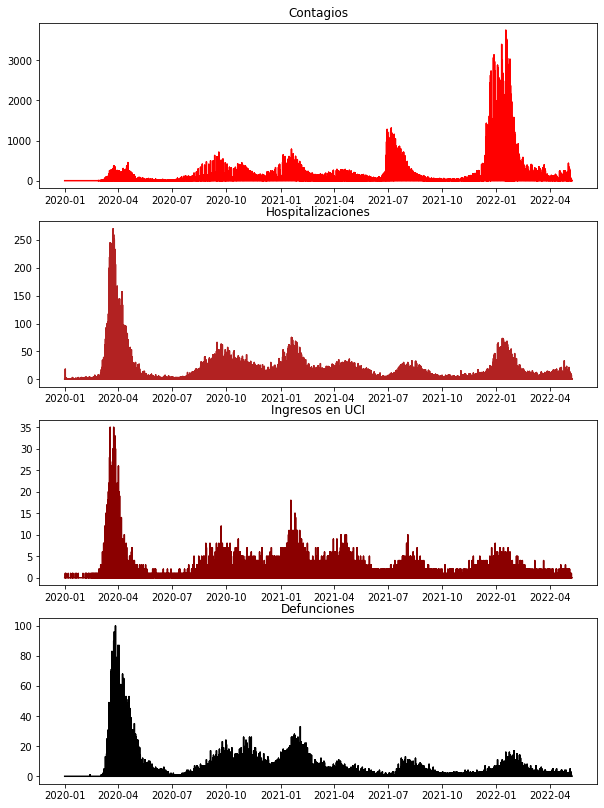

In [18]:
plt.subplot
fig,ax = plt.subplots(4,1,figsize=(10,14))

ax[0].plot(pd.to_datetime(df['fecha']),df['num_casos'],color='red')
ax[0].title.set_text('Contagios')
ax[1].plot(pd.to_datetime(df['fecha']),df['num_hosp'], color='FireBrick')
ax[1].title.set_text('Hospitalizaciones')
ax[2].plot(pd.to_datetime(df['fecha']),df['num_uci'], color='DarkRed')
ax[2].title.set_text('Ingresos en UCI')
ax[3].plot(pd.to_datetime(df['fecha']),df['num_def'], color='black')
ax[3].title.set_text('Defunciones')



plt.show()

#Conclusión 1
El menor número de contágios se ha producido en el verano de 2020 (no cuento los primeros meses de pandemia donde todavía faltaba el diagnostico correcto y la información).
La mayor número de hospitalizaciones, casos graves(UCI) y defunciones se han producido en primavera de 2020 en el principio de la pandemia. 
En diciembre 2021 - febrero 2022 hay un pico de contagios muy grande (relacionado con omicron) que no produce picos grandes en hospitalizaciones, ingresos en UCI y defunciones. Esto confirma que es la variante muy contagiosa.
Para hacer conclusión sobre si tiene las síntomas mas leves, o se debe a la vacunación nos faltan datos.


**Comparación de la evolución de la pandemia en Barcelona y Madrid**

Vuelvo a realizar las gráficas de lineas temporales para los contagios, hospitalizaciones, ingresos UCI y defunciones, pero esta vez represento en cada uno, superpuestos los datos de Barcelona y Madrid.

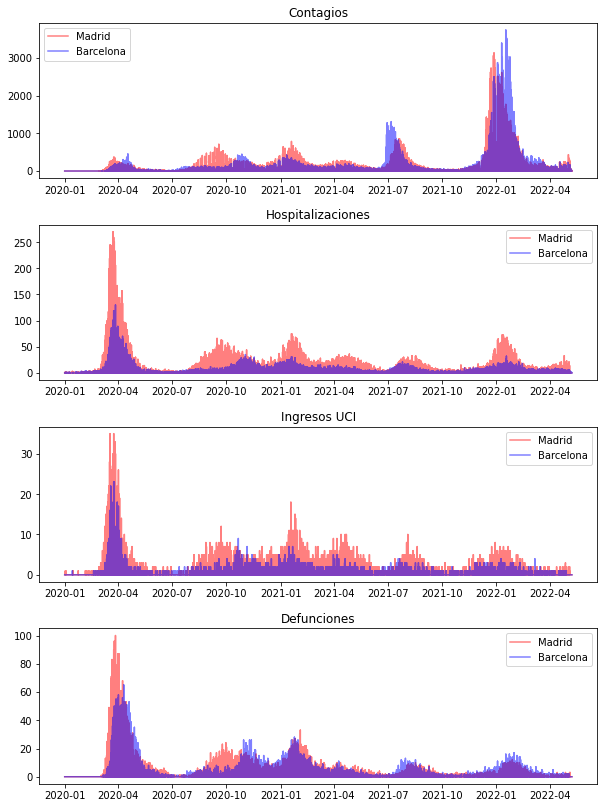

In [19]:
df_madrid = df[df['provincia_iso']=='M']
df_barcelona = df[df['provincia_iso']=='B']
 

fig,ax = plt.subplots(4,1,figsize=(10,14))
labels=['Madrid','Barcelona']
ax[0].plot(pd.to_datetime(df_madrid['fecha']),df_madrid['num_casos'], color='red', alpha=0.5)
ax[0].plot(pd.to_datetime(df_barcelona['fecha']),df_barcelona['num_casos'],color='blue', alpha=0.5)
ax[0].legend(labels=labels,loc='upper left')

ax[1].plot(pd.to_datetime(df_madrid['fecha']),df_madrid['num_hosp'], color='red', alpha=0.5)
ax[1].plot(pd.to_datetime(df_barcelona['fecha']),df_barcelona['num_hosp'],color='blue', alpha=0.5)
ax[1].legend(labels=labels,loc='upper right')

ax[2].plot(pd.to_datetime(df_madrid['fecha']),df_madrid['num_uci'], color='red', alpha=0.5)
ax[2].plot(pd.to_datetime(df_barcelona['fecha']),df_barcelona['num_uci'],color='blue', alpha=0.5)
ax[2].legend(labels=labels,loc='upper right')

ax[3].plot(pd.to_datetime(df_madrid['fecha']),df_madrid['num_def'], color='red', alpha=0.5)
ax[3].plot(pd.to_datetime(df_barcelona['fecha']),df_barcelona['num_def'],color='blue', alpha=0.5)
ax[3].legend(labels=labels,loc='upper right')

ax[0].set_title('Contagios')
ax[1].set_title('Hospitalizaciones')
ax[2].set_title('Ingresos UCI')
ax[3].set_title('Defunciones')

plt.subplots_adjust(hspace=0.30)



# Conclusión 2

La ciudad con mayores picos de contágios ha sido Barcelona, tanto en el principio de pandemia como en las últimas dos olas.  
La ciudad con mas hospitalizaciones por Covid ha sido Madrid. 

**Muertes absolutas por sexo**

Represento con un gráfico de tarta las muertes totales según el género. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


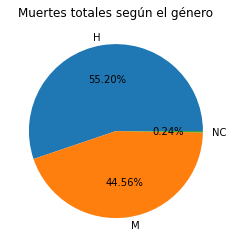

In [20]:
defunc_por_genero = df.groupby('sexo')['num_def'].agg(['sum'])
etiquetas = df['sexo'].unique()
plt.pie(defunc_por_genero, labels=etiquetas, autopct='%.2f%%')
plt.title('Muertes totales según el género')


plt.show()


# Conclusión 3  

El género con más defunciones es H con 55.16%

**Contagios por provincia**

In [30]:
contagios_provincias = df.groupby('provincia_iso')['num_casos'].agg(['sum']).sort_values(by='sum',ascending=False).reset_index()

contagios_provincias.head(5)

,provincia_iso,sum
0,B,1798005
1,M,1689187
2,V,757136
3,A,484893
4,MU,419759


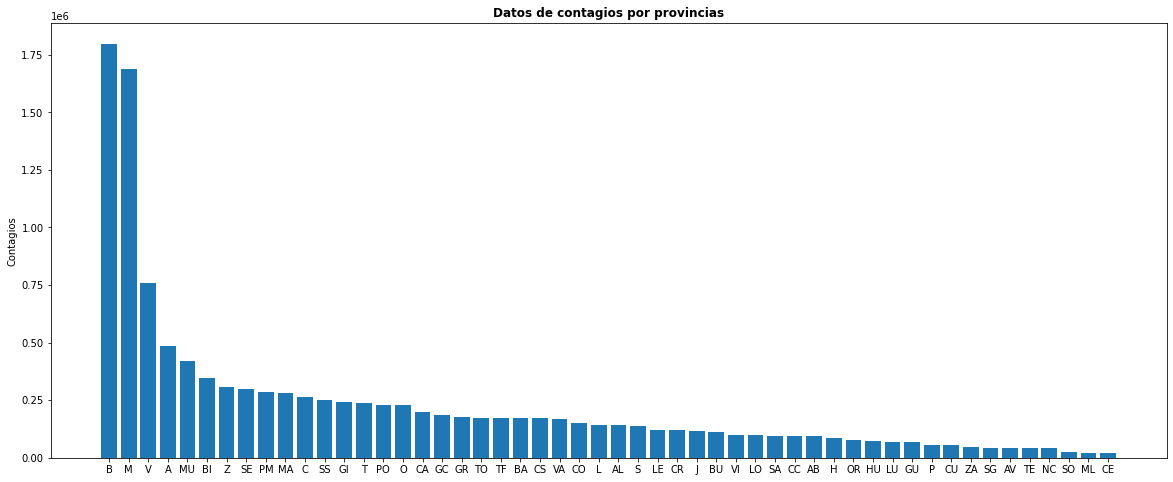

In [32]:
plt.figure(figsize=(20,8))

plt.bar(contagios_provincias['provincia_iso'], contagios_provincias['sum'])
plt.title('Datos de contagios por provincias', fontweight='bold')
plt.ylabel('Provincias')
plt.ylabel('Contagios')

plt.show()

**Grupo de edad con más ingresos a UCI**

In [58]:
ingresos_uci_por_edad = df.groupby('grupo_edad')['num_uci'].agg(['sum']).sort_values(by='sum',ascending=False)
ingresos_uci_por_edad


,sum
grupo_edad,
60-69,15093
70-79,12482
50-59,9854
40-49,5186
80+,2605
30-39,2322
20-29,889
10-19,330
0-9,325


El grupo de edad con más ingresos a UCI es 60-69 años.

Podemos ver otras metricas por edad.

In [35]:
edad = df.groupby(['grupo_edad']).sum().reset_index()
edad

,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,0-9,1064372,6469,325,25
1,10-19,1521576,5211,330,30
2,20-29,1633466,15529,889,150
3,30-39,1797751,30379,2322,357
4,40-49,2129569,51914,5186,1198
5,50-59,1534671,75313,9854,4054
6,60-69,935376,91311,15093,10538
7,70-79,619106,99658,12482,22197
8,80+,593018,147886,2605,64847
9,NC,9464,1585,162,206


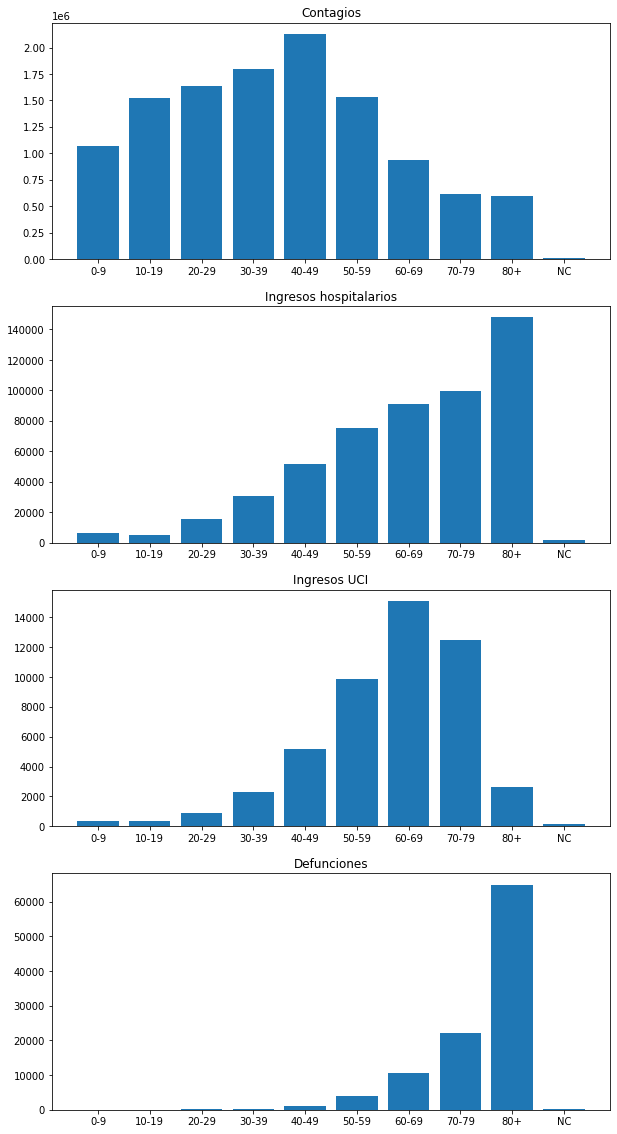

In [38]:
fig, axs = plt.subplots(4,1, figsize=(10, 20))
axs[0].bar(edad['grupo_edad'], edad['num_casos'])
axs[0].title.set_text('Contagios')
axs[1].bar(edad['grupo_edad'], edad['num_hosp'])
axs[1].title.set_text('Ingresos hospitalarios')
axs[2].bar(edad['grupo_edad'], edad['num_uci'])
axs[2].title.set_text('Ingresos UCI')
axs[3].bar(edad['grupo_edad'], edad['num_def'])
axs[3].title.set_text('Defunciones')

